In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from random import randrange

# 1 Aquisição dos dados

In [4]:
path = '/content/drive/MyDrive/Sistemas_de_Informação/Sistemas inteligentes/RESOLUÇÕES/atv_05/'

In [8]:
df = pd.read_csv(path+'iris_flower.csv')
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x = df.iloc[:, [2,3]].values

# 2 Definindo o número de clusters

In [35]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(x)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)

550.6434666666669
86.40394533571003
31.38775897435897
19.499400899685114
14.084349656750572
11.079414800946152
9.514800341130606
8.278238236896588
6.8327306680247855


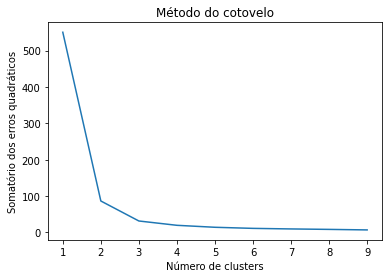

In [36]:
plt.plot(range(1, 10), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Somatório dos erros quadráticos')
plt.show()

# 3 Visualização dos clusters

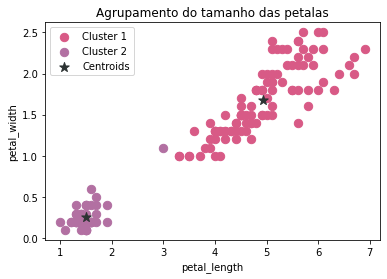

In [40]:
kmeans = KMeans(n_clusters=2, init='random', n_init=100)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 70, c = '#D85A86', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 70, c = '#B270A2', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = '#2C3333', label = 'Centroids')
plt.title('Agrupamento do tamanho das petalas')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

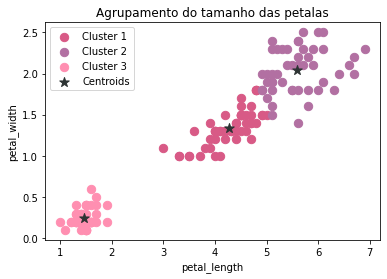

In [41]:
kmeans = KMeans(n_clusters=3, init='random', n_init=100)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 70, c = '#D85A86', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 70, c = '#B270A2', label ='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 70, c = '#FF8FB1', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = '#2C3333', label = 'Centroids')
plt.title('Agrupamento do tamanho das petalas')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

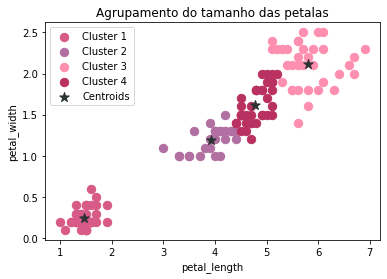

In [42]:
kmeans = KMeans(n_clusters=4, init='random', n_init=100)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 70, c = '#D85A86', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 70, c = '#B270A2', label ='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 70, c = '#FF8FB1', label ='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 70, c = '#B93160', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = '#2C3333', label = 'Centroids')
plt.title('Agrupamento do tamanho das petalas')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

# 4 Treinamento do modelo 

In [95]:
numsRandom = sorted([randrange(300,5000) for i in range(4)])
numsRandom

[644, 1385, 1423, 4260]

In [96]:
def runCentroid(kmList,init,n,x):
  kmeans = KMeans(n_clusters = 3, init = init, n_init=n)
  kmeans.fit(x)
  kmList.append(kmeans)
  print('='*30)
  print('n_init = ',n)
  print(kmeans.cluster_centers_)
  print('='*30)

In [97]:
def graficoCentroid(kmeans,x,n):
  plt.title(f'n_init = {n}')
  plt.scatter(list(map(lambda x: x[0], kmeans.cluster_centers_)), list(map(lambda x: x[1], kmeans.cluster_centers_)), s = 70, c='#B93160')
  plt.show()

In [98]:
def graficoCluster(kmeans, x, n):
  plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 70, c = '#D85A86', label = 'Cluster 1')
  plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 70, c = '#B270A2', label ='Cluster 2')
  plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 70, c = '#FF8FB1', label ='Cluster 3')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 100, c = '#2C3333', label = 'Centroids')
  plt.title(f'Agrupamento do tamanho das petalas ({n})')
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.legend()
  plt.show()

## 4.1 Random

In [99]:
kmRandom = []

In [100]:
for n in numsRandom:
  runCentroid(kmRandom,'random',n,x)

n_init =  644
[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
n_init =  1385
[[4.26923077 1.34230769]
 [5.59583333 2.0375    ]
 [1.464      0.244     ]]
n_init =  1423
[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
n_init =  4260
[[5.59583333 2.0375    ]
 [1.464      0.244     ]
 [4.26923077 1.34230769]]


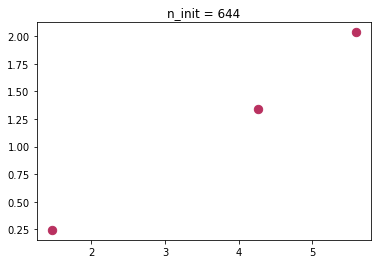

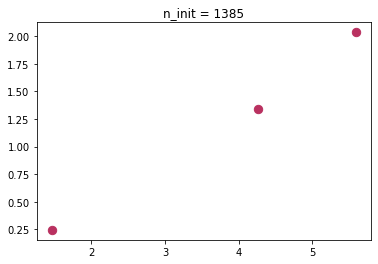

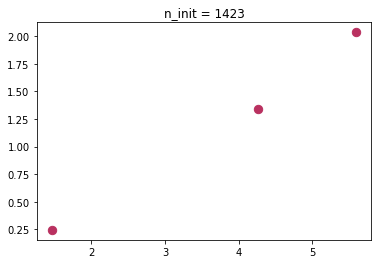

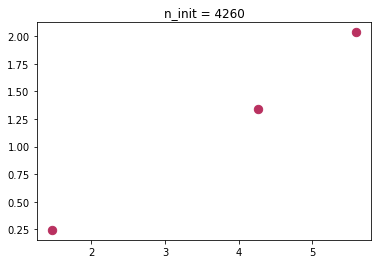

In [101]:
for (km, n) in zip(kmRandom, numsRandom):
  graficoCentroid(km,x,n)

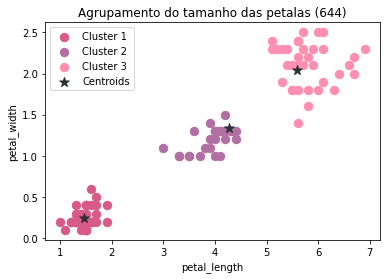

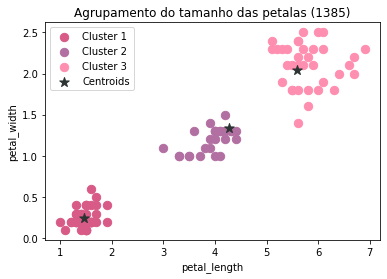

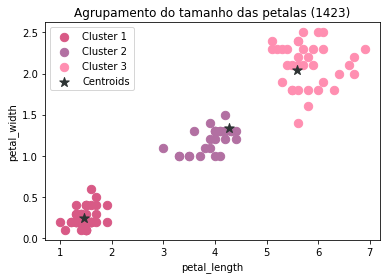

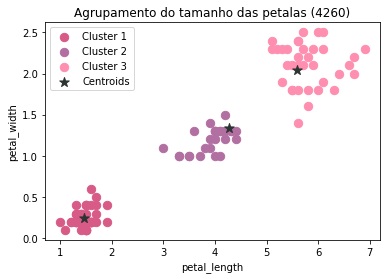

In [102]:
for (km, n) in zip(kmRandom, numsRandom):
  graficoCluster(km,x,n)

## 4.2 Kmeans++

In [103]:
kmPlus = []

In [104]:
for n in numsRandom:
  runCentroid(kmPlus,'k-means++',n,x)

n_init =  644
[[4.26923077 1.34230769]
 [5.59583333 2.0375    ]
 [1.464      0.244     ]]
n_init =  1385
[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
n_init =  1423
[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
n_init =  4260
[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


In [105]:
kmPlus

[KMeans(n_clusters=3, n_init=644),
 KMeans(n_clusters=3, n_init=1385),
 KMeans(n_clusters=3, n_init=1423),
 KMeans(n_clusters=3, n_init=4260)]

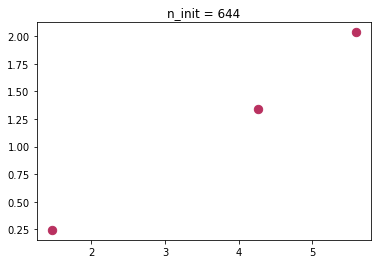

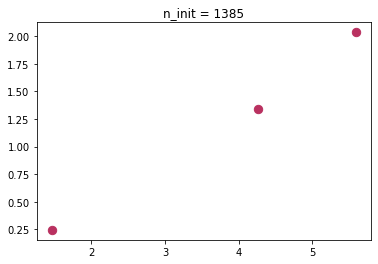

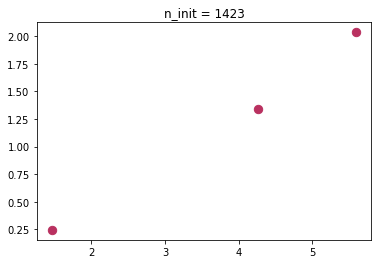

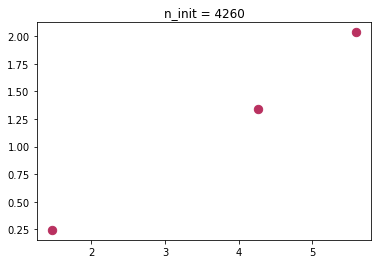

In [106]:
for (km, n) in zip(kmPlus, numsRandom):
  graficoCentroid(km,x,n)

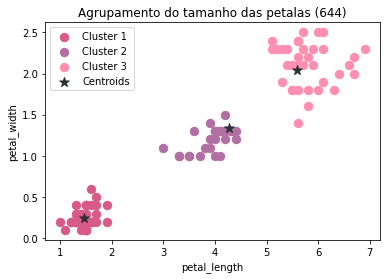

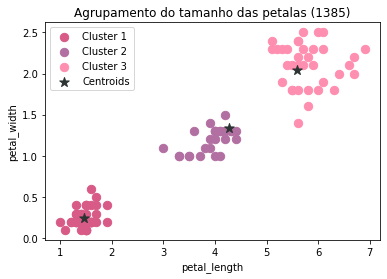

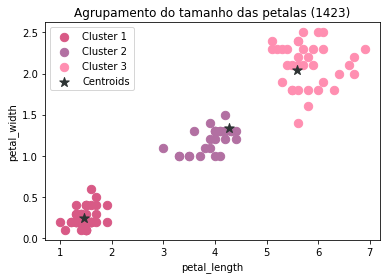

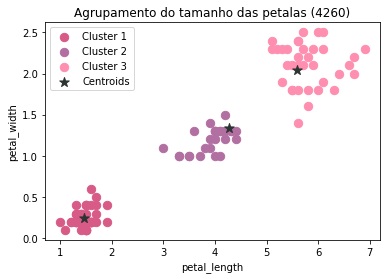

In [107]:
for (km, n) in zip(kmPlus, numsRandom):
  graficoCluster(km,x,n)